In [1]:
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
from pathlib import Path
csvpath = Path("../Project 2/Resources/DOGE_USD.csv")
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-07-19,DOGE,0.175495,0.181572,0.184161,0.170533
2021-07-20,DOGE,0.169323,0.173637,0.180560,0.160012
2021-07-21,DOGE,0.190550,0.170544,0.214442,0.168499
2021-07-22,DOGE,0.190272,0.190489,0.196412,0.186712
2021-07-23,DOGE,0.192075,0.191305,0.199786,0.183192


<AxesSubplot:xlabel='Date'>

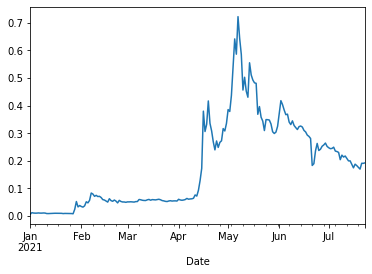

In [3]:
df["Closing Price (USD)"].plot()

<AxesSubplot:xlabel='Date'>

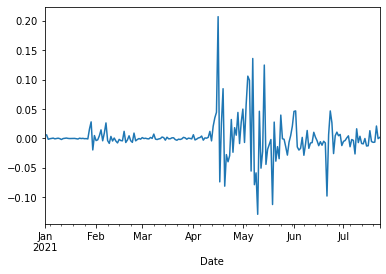

In [4]:
# Differencing the Settle price stationarizes the time series
df["Closing Price (USD)"].diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

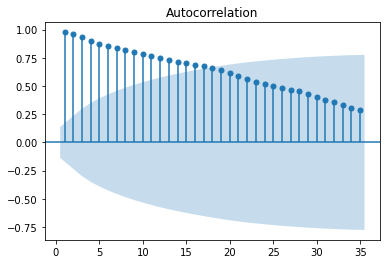

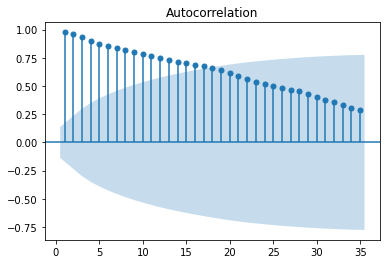

In [6]:
# Plot the autocorrelation of the Settle Prices
plot_acf(df["Closing Price (USD)"], zero=False, lags=35)

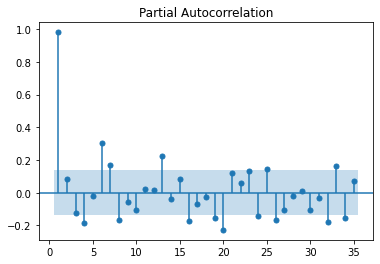

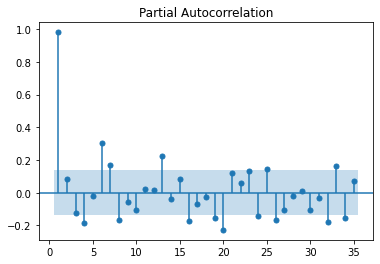

In [7]:
# Plot the partial autocorrelation of the returns
plot_pacf(df["Closing Price (USD)"], zero=False, lags=35)

# ARIMA Model

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
# Create an ARIMA model
model = ARIMA(df["Closing Price (USD)"].values, order=(18, 1, 0))

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [10]:
# Fit the model to the data
results = model.fit()

In [11]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                ARIMA(18, 1, 0)   Log Likelihood                 428.646
Method:                       css-mle   S.D. of innovations              0.029
Date:                Tue, 03 Aug 2021   AIC                           -817.291
Time:                        19:39:14   BIC                           -751.027
Sample:                             1   HQIC                          -790.484
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.002      0.432      0.666      -0.003       0.005
ar.L1.D.y     -0.0988      0.069     -1.424      0.154      -0.235       0.037
ar.L2.D.y      0.1461      0.070      2.103      0.036       0.010       0.282
ar.L3.D.y      0.2304      0.070      3.275      0.001       0.093       0.368
ar.L4.D.y      0.0083      0.072      0.116      0.907      -0.132       0.149
ar.L5.D.y     -0.2683      0.071     -3.769      0.000      -0.408      -0.129
ar.L6.D.y     -0.1527      0.074     -2.065      0.039      -0.298      -0.008
ar.L7.D.y      0.0588      0.074      0.799      0.425      -0.085       0.203
ar.L8.D.y     -0.0096      0.073     -0.131      0.896      -0.153       0.134
ar.L9.D.y      0.0817      0.073      1.121      0.262      -0.061       0.225
ar.L10.D.y     0.0399      0.073      0.547      0.585      -0.103       0.183
ar.L11.D.y    -0.0045      0.073     -0.062      0.951      -0.147       0.138
ar.L12.D.y    -0.1537      0.073     -2.117      0.034      -0.296      -0.011
ar.L13.D.y     0.0258      0.073      0.356      0.722      -0.116       0.168
ar.L14.D.y    -0.0925      0.070     -1.323      0.186      -0.229       0.045
ar.L15.D.y     0.0678      0.070      0.968      0.333      -0.070       0.205
ar.L16.D.y     0.0036      0.068      0.053      0.958      -0.131       0.138
ar.L17.D.y     0.0306      0.068      0.453      0.650      -0.102       0.163
ar.L18.D.y     0.1224      0.067      1.824      0.068      -0.009       0.254
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.1395           -0.0000j            1.1395           -0.0000
AR.2             1.0229           -0.3657j            1.0863           -0.0547
AR.3             1.0229           +0.3657j            1.0863            0.0547
AR.4             0.8236           -0.6671j            1.0598           -0.1084
AR.5             0.8236           +0.6671j            1.0598            0.1084
AR.6             0.5839           -1.0702j            1.2191           -0.1705
AR.7             0.5839           +1.0702j            1.2191            0.1705
AR.8             0.1777           -1.1466j            1.1603           -0.2255
AR.9             0.1777           +1.1466j            1.1603            0.2255
AR.10           -0.2578           -1.0754j            1.1059           -0.2874
AR.11           -0.2578           +1.0754j            1.1059            0.2874
AR.12           -0.5084           -0.9858j            1.1091           -0.3258
AR.13           -0.5084           +0.9858j            1.1091            0.3258
AR.14           -0.8428           -0.6859j            1.0867           -0.3913
AR.15           -0.8428           +0.6859j            1.0867            0.3913
AR

<AxesSubplot:title={'center':'Futures Forecast'}>

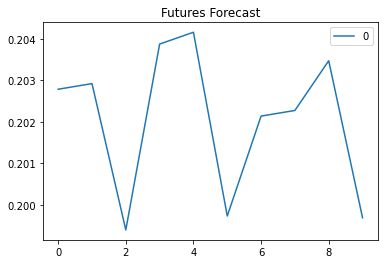

In [12]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [13]:
# save model
results.save('doge_model1.pkl')

# ARIMA Model using a Lag of 2

In [14]:
# Create an ARIMA Model and fit it to the data
model2 = ARIMA(df["Closing Price (USD)"].values, order=(20, 1, 0))
results2 = model2.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [15]:
# print the model summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                ARIMA(20, 1, 0)   Log Likelihood                 432.157
Method:                       css-mle   S.D. of innovations              0.029
Date:                Tue, 03 Aug 2021   AIC                           -820.314
Time:                        19:51:10   BIC                           -747.424
Sample:                             1   HQIC                          -790.826
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.002      0.406      0.685      -0.003       0.005
ar.L1.D.y     -0.1021      0.070     -1.468      0.142      -0.238       0.034
ar.L2.D.y      0.1571      0.069      2.277      0.023       0.022       0.292
ar.L3.D.y      0.2308      0.069      3.347      0.001       0.096       0.366
ar.L4.D.y     -0.0065      0.071     -0.093      0.926      -0.145       0.132
ar.L5.D.y     -0.2455      0.070     -3.490      0.000      -0.383      -0.108
ar.L6.D.y     -0.1630      0.073     -2.244      0.025      -0.305      -0.021
ar.L7.D.y      0.0899      0.073      1.230      0.219      -0.053       0.233
ar.L8.D.y     -0.0276      0.073     -0.378      0.706      -0.171       0.116
ar.L9.D.y      0.0751      0.071      1.052      0.293      -0.065       0.215
ar.L10.D.y     0.0297      0.072      0.411      0.681      -0.112       0.171
ar.L11.D.y     0.0060      0.072      0.084      0.933      -0.135       0.147
ar.L12.D.y    -0.1638      0.071     -2.301      0.021      -0.303      -0.024
ar.L13.D.y     0.0581      0.072      0.805      0.421      -0.083       0.200
ar.L14.D.y    -0.0683      0.072     -0.950      0.342      -0.209       0.073
ar.L15.D.y     0.0397      0.071      0.560      0.576      -0.099       0.179
ar.L16.D.y    -0.0312      0.069     -0.453      0.651      -0.166       0.104
ar.L17.D.y     0.0331      0.069      0.481      0.631      -0.102       0.168
ar.L18.D.y     0.1514      0.067      2.267      0.023       0.020       0.282
ar.L19.D.y     0.1340      0.067      2.007      0.045       0.003       0.265
ar.L20.D.y    -0.1020      0.067     -1.522      0.128      -0.233       0.029
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0363           -0.2335j            1.0623           -0.4647
AR.2            -1.0363           +0.2335j            1.0623            0.4647
AR.3            -1.0348           -0.4995j            1.1491           -0.4284
AR.4            -1.0348           +0.4995j            1.1491            0.4284
AR.5            -0.7922           -0.7368j            1.0819           -0.3808
AR.6            -0.7922           +0.7368j            1.0819            0.3808
AR.7            -0.4560           -0.9566j            1.0597           -0.3208
AR.8            -0.4560           +0.9566j            1.0597            0.3208
AR.9            -0.2083           -1.0447j            1.0652           -0.2813
AR.10           -0.2083           +1.0447j            1.0652            0.2813
AR.11            0.1850           -1.0702j            1.0860           -0.2228
AR.12            0.1850           +1.0702j            1.0860            0.2228
AR.13            0.5781           -0.9701j            1.1293           -0.1645
AR

<AxesSubplot:title={'center':'Futures Forecast'}>

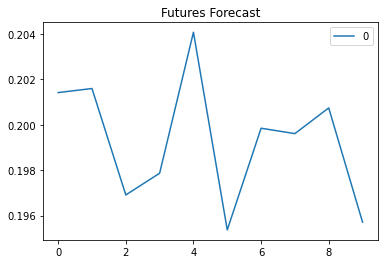

In [16]:
# Plot the Futures Price Forecast
pd.DataFrame(results2.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [17]:
# save model
results2.save('doge_model2.pkl')